# 다차원 텐서 (다차원 배열)

In [2]:
import numpy as np

### 다차원 배열의 계산 복습

In [8]:
A = np.array([[1,2,3],
             [4,5,6]])
B = np.array([[7,8,9],
             [10,11,12]])

add_result=A+B

vec=np.array([1,2,3])
add_result2=A+vec   # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result=A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다차원 배열의 계산으로 순전파 구현

In [22]:
# 입력 데이터
X=np.random.randn(4,5)  # 4개의 샘플, 5차원 feature

# 가중치
W=np.random.randn(5,3)  # 5개의 입력 (feature), 3개의 뉴런으로 구성된 레이어

# 편향
b=np.random.randn(1,3)

# 선형 계산 (W*X + b)
z=np.dot(X,W)+b

# ReLU 활성화 함수
result=np.maximum(0,z)
print(result)

[[0.         0.         0.        ]
 [0.         0.39719914 0.        ]
 [0.         0.         3.13968179]
 [0.         0.         0.        ]]


### 다층 퍼셉트론

In [32]:
X=np.random.randn(6,10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
w1=np.random.randn(10,8)
b1=np.random.randn(1,8)

# 출력층 : 8개의 입력 -> 4개의 클래스
w2=np.random.randn(8,4)
b2=np.random.randn(1,4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)

z1=np.dot(X,w1)+b1
result1=np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)

z2=np.dot(result1,w2)+b2
exp_z=np.exp(z2-np.max(z2,axis=1,keepdims=True))
result2=exp_z/np.sum(exp_z,axis=1,keepdims=True)

print(result2)

[[2.77252206e-02 3.17801639e-03 9.64906089e-01 4.19067431e-03]
 [4.80597975e-01 5.10265886e-01 8.63139520e-03 5.04743638e-04]
 [1.12837878e-01 8.86560059e-01 1.43914360e-04 4.58149050e-04]
 [8.28681190e-04 9.78136862e-03 1.02659731e-03 9.88363353e-01]
 [3.73711651e-01 6.12964778e-01 1.48559153e-04 1.31750118e-02]
 [4.34489358e-02 5.98612985e-03 3.99070532e-03 9.46574229e-01]]


### 이미지 데이터 예시

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

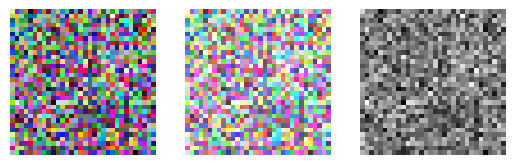

In [71]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size=5
channels=3
height=32
width=32

images=np.random.rand(batch_size,channels,height,width)

bright_images=np.clip(images+0.2,0,1)

gray_images=np.mean(images,axis=1)

# PyTorch 프레임워크에서는 이미지 데이터를 (채널,높의,너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이,너비,채널) 순서로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display=images[0].transpose(1,2,0)
bright_images_display=bright_images[0].transpose(1,2,0)

plt.subplot(1,3,1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gray_images[0],cmap='grey')
plt.axis('off')